# Exoplanet Irradiation Plot
We use data downloaded on 27 March 2024 from the NASA Exoplanets Archive to create a plot to illustrate the difference of irradiaiton between the transiting exoplanets and the Solar SYstem planets

In [77]:
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt


In [78]:
# useful constants
r_e = 6378e6 # cm
m_e = 5.9722e27 # g
lsun = 3.828e33 # erg/s
rsun = 6.957e+10 # cm|
au = 1.49597870700e13 # cm
G = 6.67430e-8 # cgs units
sb = 5.670374419e-5 # cgs units

In [79]:
def lstar(r,T):
    return 4.0*np.pi*r*r*sb*T*T*T*T

def irrad_rat(L,a):
    return L/lsun/(a*a)

def ve_ms(m,r):
    return np.sqrt(2.0*G*m/r)/100.

In [80]:
exo = Table.read("ExoplanetsTransitGood.csv",format='ascii')
#exo.show_in_notebook()
exo_a = np.array(exo['pl_orbsmax'])
exo_rp = np.array(exo['pl_rade'])
exo_mp = np.array(exo['pl_bmasse'])
exo_rstar = rsun*np.array(exo['st_rad'])
exo_teff = np.array(exo['st_teff'])
exo_l = lstar(exo_rstar,exo_teff)
exo_ir = irrad_rat(exo_l,exo_a)
exo_ve = ve(exo_mp,exo_rp)

In [81]:
ss = Table.read("SolarSystem.csv",format='ascii')
#ss.show_in_notebook()
ss_a = np.array(ss['a'])
ss_rp = np.array(ss['r'])
ss_mp = np.array(ss['m'])
ss_lab = np.array(ss['lab'],dtype=str)
ss_ir = 1.0/ss_a/ss_a
ss_ve = ve(ss_mp,ss_rp)

Text(0, 0.5, 'Mass (M$_\\oplus$)')

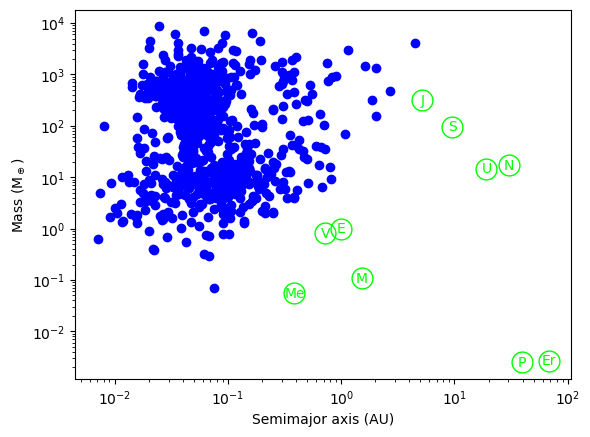

In [84]:
plt.plot(exo_a,exo_mp,'o',color='b')
plt.plot(ss_a,ss_mp,'o',color='lime', markersize=15, markerfacecolor='none')
for x,y,t in zip(ss_a,ss_mp,ss_lab):
    plt.text(x,y,t,color='lime',ha='center', va='center')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Semimajor axis (AU)')
plt.ylabel(r'Mass (M$_\oplus$)')

Text(0.5, 0, 'Escape Velocity in m/s')

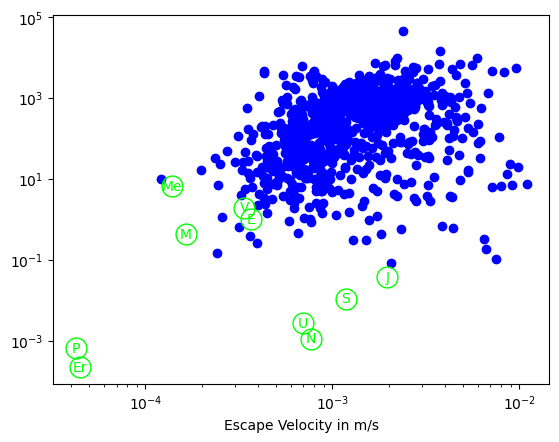

In [85]:
plt.plot(exo_ve,exo_ir,'o',color='b')
plt.plot(ss_ve,ss_ir,'o',color='lime', markersize=15, markerfacecolor='none')
for x,y,t in zip(ss_ve,ss_ir,ss_lab):
    plt.text(x,y,t,color='lime',ha='center', va='center')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Irradiation relative to Earth')
plt.xlabel('Escape Velocity in m/s')